Generating initial weights ...
Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Epoch: 1000
Epoch: 1100
Epoch: 1200
Epoch: 1300
Epoch: 1400
Epoch: 1500
Epoch: 1600
Epoch: 1700
Epoch: 1800
Epoch: 1900
Testing ...
Test Label: dove
(10, 10)


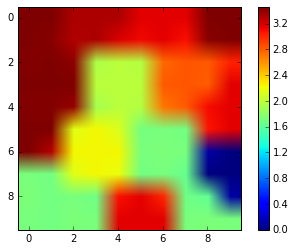

Test Label: hen
(10, 10)


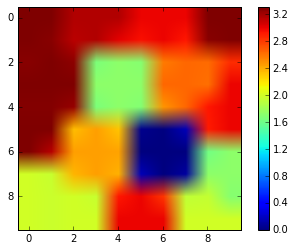

Test Label: duck
(10, 10)


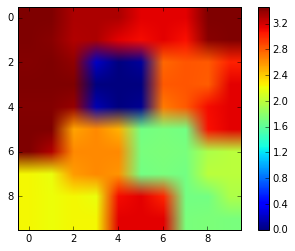

Test Label: goose
(10, 10)


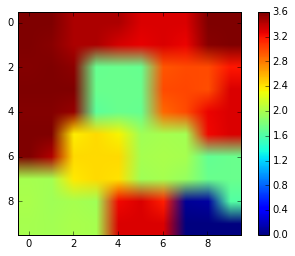

Test Label: owl
(10, 10)


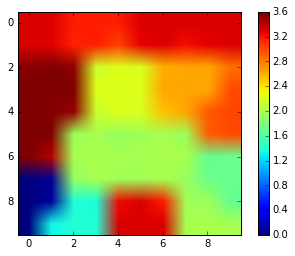

Test Label: hawk
(10, 10)


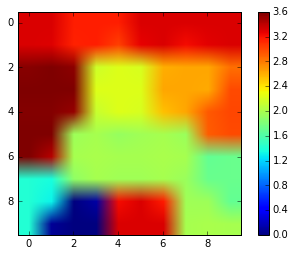

Test Label: eagle
(10, 10)


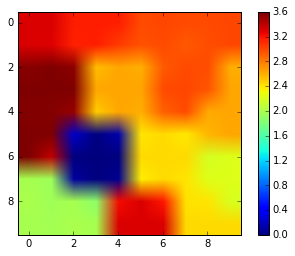

Test Label: fox
(10, 10)


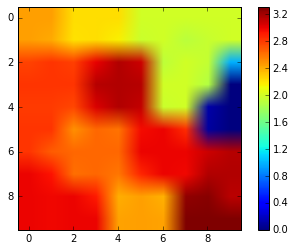

Test Label: dog
(10, 10)


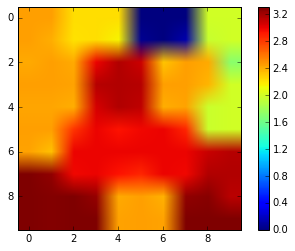

Test Label: wolf
(10, 10)


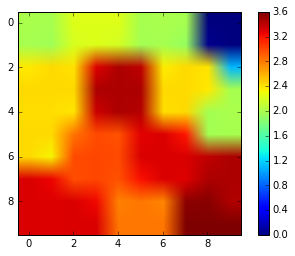

Test Label: cat
(10, 10)


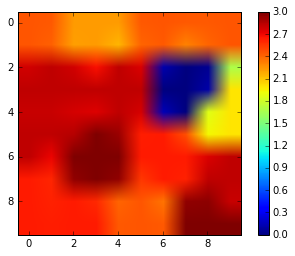

Test Label: tiger
(10, 10)


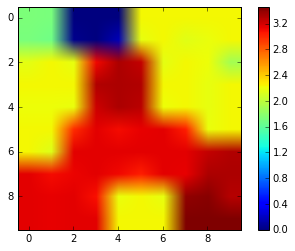

Test Label: lion
(10, 10)


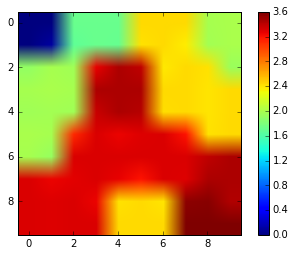

Test Label: horse
(10, 10)


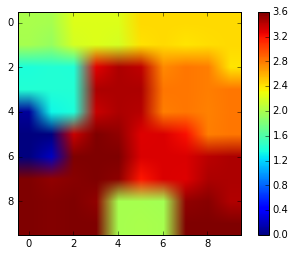

Test Label: zebra
(10, 10)


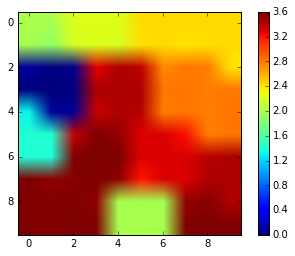

Test Label: cow
(10, 10)


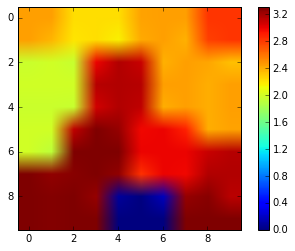

Mapping Unknown animals
Test Label: goat
(10, 10)


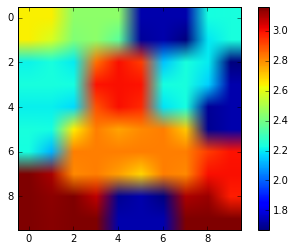

Test Label: pig
(10, 10)


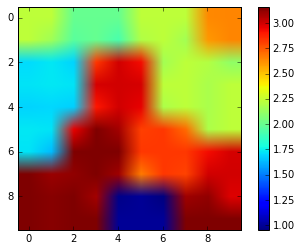

Test Label: badger
(10, 10)


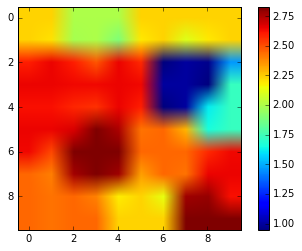

Test Label: ostrich
(10, 10)


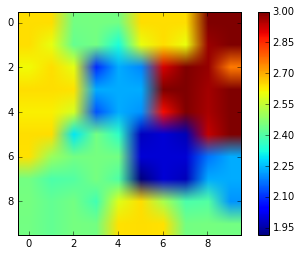

Test Label: bat
(10, 10)


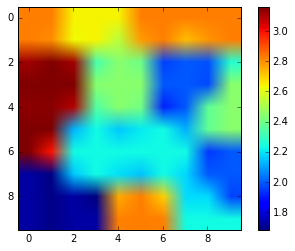

Test Label: blue whale
(10, 10)


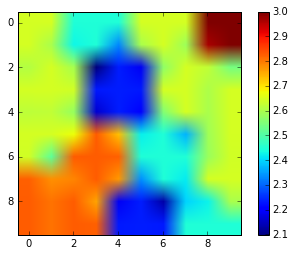

Test Label: killer whale
(10, 10)


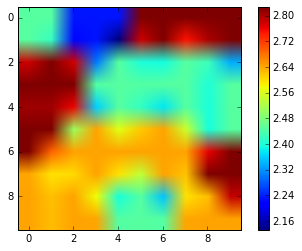

In [1]:
import numpy as np
from scipy.spatial.distance import euclidean
from math import sqrt,exp
import time
import matplotlib.pyplot as plt
%matplotlib inline


class SOFM(object):
	"""docstring for SOFM"""
	def __init__(self, shape,input_size,sigma0,touN,learning_rate):
		super(SOFM, self).__init__()
		# Input Size
		self.input_size = input_size
		# Network Shape 10x10
		self.shape = shape
		# Weights Shape 
		self.weights_shape = (self.shape[0]*self.shape[1], self.input_size)

		# Initial Weights 
		self.weights = self.gen_initial_weights()

		# Epoch Count 
		self.epoch = 0

		# sigma0, touN used to update variance
		self.sigma0 = sigma0
		self.touN = touN

		# Initial learning rate
		self.learning_rate = learning_rate



	""" 
	Initial Weights 
	Shape = (10x10, input_size)
	"""
	def gen_initial_weights(self):
		weights = np.random.uniform(0,0.5,(self.shape[0]*self.shape[1], self.input_size))
		# print(self.weights)
		# self.weights = np.random.uniform(0,0.5,(100,5))
		print("Generating initial weights ...")
		return weights



	""" 
		determines the winner element and find's the SQUARE of 
		euclidean distance from the given winner position to all 
		other elements and returns a new matrix
		|| ri - ri* || ** 2
	"""
	def matrix_euclidean(self,winner_pos,output_matrix):
		a = output_matrix
		# riH = np.unravel_index(a.argmax(), a.shape)
		riH = winner_pos
		tmp = []
		for i in range(a.shape[0]):
		    for j in range(a.shape[1]):
		        tmp.append(abs((riH[0]-i)**2 + (riH[1]-j)**2))
		b = np.matrix(tmp)
		b.shape = a.shape
		return b



	""" 
	Finding the winner neuron using arg min || wi - xq ||, for each neuron wj 
	lets find the min(|| inbound_weights - inputs ||)
	Returns the winner neuron positions, output array
	"""
	def find_winner_neuron(self,input_dp):
		tmp = []
		tmp_weights = self.weights
		for wt in self.weights:
			# (w11,w12,w13...w1q) and (x1,x2,x3....xq)
			tmp.append(euclidean(wt, input_dp))
		# Convert tmp list to numpy array and reshape it to find
		# winning neuron position
		tmp = np.array(tmp)
		tmp.shape = self.shape
		# Find the argmin neuron position
		winner = np.unravel_index(tmp.argmin(), tmp.shape)
		return winner,tmp



	"""
		Calculate variable sigma
	"""
	def update_sigma(self):
		return (self.sigma0*exp(-self.epoch/self.touN))



	""" 
		Calculate deltas for neurons delta(i,i*,t)
		exp(-||ri-ri*||^2 / 2*sigma(t)^2)
	"""
	def deltas(self,n_euc_dist,sigma):
		tmp = []
		# iterate over all euclidean distances of neuron from winner
		# HARDCODED range
		for i in range(100):
			tmp.append(exp(-n_euc_dist.item(i)/(2*sigma**2)))
		# returns numpy array instead of list
		return np.array(tmp)



	"""
		Update weights 
	"""
	def update_weights(self,new_learning_rate,new_deltas,input_dp):
		tmp_weights = []
		# print(len(new_deltas), len(self.weights))
		for new_dt, wt in zip(new_deltas,self.weights):
			tmp_weights.append((wt+(new_learning_rate*new_dt*(input_dp - wt))))
		# convert list to array
		updated_weights = np.array(tmp_weights)
		# reshape the array
		updated_weights.shape = self.weights_shape
		# assign updated weights
		self.weights = updated_weights
		return None



	"""
		variable learning rate
	"""
	def update_learning_rate(self):
		return (self.learning_rate*exp(-self.epoch/self.touN))



	"""
		Train the SOFM net over single epoch
	"""
	def train_epoch(self,input_dataset):
		# increment self.epoch 
		self.epoch += 1

		# iterate over each data point in dataset
		for dp in input_dataset:
			winner,output_matrix = self.find_winner_neuron(dp)
			n_euc_dist = self.matrix_euclidean(winner,output_matrix)
			# print(n_euc_dist.shape)
			new_sigma = self.update_sigma()
			new_deltas = self.deltas(n_euc_dist,new_sigma)
			# print(new_deltas.shape)
			new_learning_rate = self.update_learning_rate()
			self.update_weights(new_learning_rate,new_deltas,dp)



	""" 
		Train the network over 2000 epochs 
	"""
	def train(self,input_dataset,lables,iterations):
		for i in range(iterations):
			self.train_epoch(input_dataset)
			if i % 100 == 0:
				print('Epoch: {}'.format(i))

	"""
		Test the network
	"""
	def test(self,input_dataset,lables):
		for dp,lbl in zip(input_dataset,lables):
			print("Test Label: {}".format(lbl))
			winner,output_matrix = self.find_winner_neuron(dp)
			# print (output_matrix)
			# plt.matshow(output_matrix,fignum=100, cmap=plt.cm.gray)
			print(output_matrix.shape)
			plt.imshow(output_matrix)
			plt.figure(1)
			plt.colorbar()
			plt.show()


def main():
	data = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1],[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0],[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0]]
	lables = ['dove','hen','duck','goose','owl','hawk','eagle','fox','dog','wolf','cat','tiger','lion','horse','zebra','cow']


	data2 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1]]
	lables2 = ['goat','pig','badger','ostrich','bat','blue whale','killer whale']
	# a = np.matrix([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
	# a.shape = (4,4)
	# print(matrix_euclidean((1,1),a))
	# shape,input_size,sigma0,touN,learning_rate
	tmp = SOFM((10,10),29,1.5,100,3)
	tmp.train(data,lables,2000)
	print("Testing ...")
	tmp.test(data,lables)
	print("Mapping Unknown animals")
	tmp.test(data2,lables2)

if __name__=="__main__":
	main()

